----------------------------------

# Visão Geral

- Leitura: 30 min

### Requisitos:
- Conhecimentos básicos da linguagem Python
- Conhecimentos básicos em Notebook Jupyter

### Conteúdo:
1. Histogramas
2. Equalização de Histogramas
---------------------------

### 1. Histogramas

Em relação a imagens digitais um histograma é uma representação gráfica que mostra a frequência de ocorrência das intensidade dos pixels de uma imagem. O eixo x do gráfico normalmente possui as intensidades dos pixels e o eixo y é plotado a quantidade de pixels daquela intensidade.

Histogramas são úteis para detectar alterações de cores entre imagens, além de serem usados como etapa preparatória de algoritmos de limiarização e detecção de bordas.

#### 1.1 Criando histograma de imagens em tons de cinza

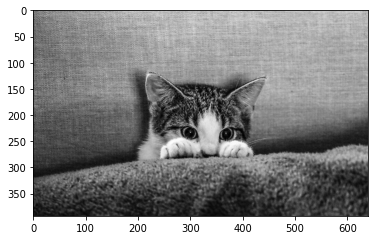

In [1]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt

# abrindo a imagem
imagem = cv2.imread('../../figures/gato.jpg')
# converte imagem para tons de cinza (gray)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# mostrando a imagem em tons de cinza
plt.imshow(imagem, cmap="gray")

A biblioteca OpenCV possui a função calcHist que calcula o histograma da imagem.


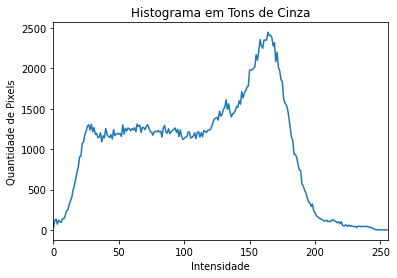

In [2]:
# criando o histograma da imagem em tons de cinza
h = cv2.calcHist([imagem], [0], None, [256], [0, 256])

# criando o gráfico do histograma
plt.figure()
plt.title("Histograma em Tons de Cinza")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()

Também podemos calcular o histograma de uma imagem usando a função histogram da biblioteca Numpy.

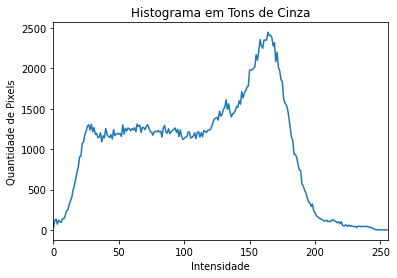

In [3]:
# importação da biblioteca Numpy
import numpy as np

# criando o histograma da imagem em tons de cinza
h2, b = np.histogram(imagem, bins=256, range=(0, 256))

# criando o gráfico do histograma
plt.figure()
plt.title("Histograma em Tons de Cinza")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h2)
plt.xlim([0, 256])
plt.show()

#### 1.2 Histograma dos canais RGB

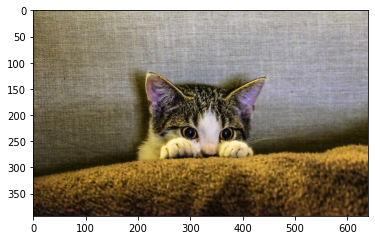

In [4]:
# abrindo a imagem
imagem = cv2.imread('../../figures/gato.jpg')
# converte imagem para tons de cinza (gray)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
# mostrando imagem colorida
plt.imshow(imagem)

Criando o histograma dos canais rgb.

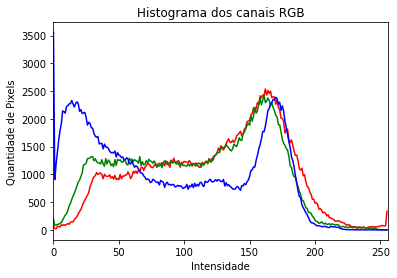

In [5]:
#dividindo os canais rgb da imagem
canais = cv2.split(imagem)
cores = ("red", "green", "blue")

# criando o gráfico do histograma
plt.figure()
plt.title("Histograma dos canais RGB")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")

# este loop executa 3 vezes, uma para cada canal
for (canal, cor) in zip(canais, cores):
    hist, b = np.histogram(canal, bins=256, range=(0, 256))
    plt.plot(hist, cor)
    plt.xlim([0, 256])
plt.show()

### 2. Equalização de Histogramas

A Equalização de Histograma é um calculo sobre a distribuição de pixels que permite aumentar o contraste da imagem. Este calcula distribui de forma mais uniforme as intensidades dos pixels sobre a imagem. Um melhor constraste na imagem pode ser útil em tarefas de segmentação e detecção de objetos.

A biblioteca OpenCV disponibiliza a função *equalizeHist* para equalizar o histograma da imagem.

In [6]:
# convertendo imagem para tons de cinza
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

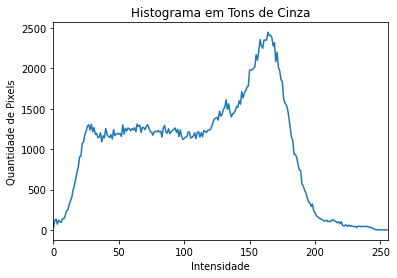

In [7]:
## mostrando o histograma em tons de cinza da imagel original
plt.figure()
plt.title("Histograma em Tons de Cinza")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()

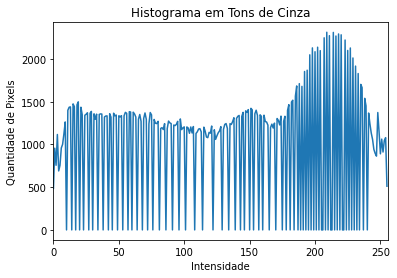

In [8]:
# equalizando o histograma da imagem
imagem_equalizada = cv2.equalizeHist(imagem)

# criando o histograma da imagem em tons de cinza
h_eq, b = np.histogram(imagem_equalizada, bins=256, range=(0, 256))

## mostrando o histograma em tons de cinza da imagel original
plt.figure()
plt.title("Histograma em Tons de Cinza")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h_eq)
plt.xlim([0, 256])
plt.show()

A diferença pode ser observado nas imagens.

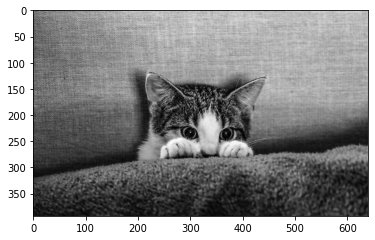

In [9]:
#mostrando imagem original
plt.imshow(imagem, cmap='gray')

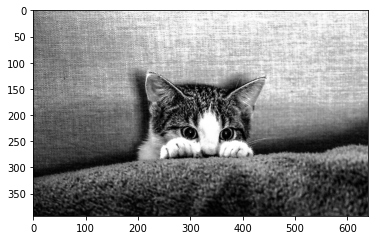

In [10]:
#mostrando imagem equalizada
plt.imshow(imagem_equalizada, cmap='gray')

# Apoio

Universidade Tecnólogica Federal do Paraná - UTFPR

# Referências

- Documentação do OpenCV-Python-Tutoriais - Histograms in OPenCV (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

- Lições da Data Carpentry - Creating Histograms (https://datacarpentry.org/image-processing/05-creating-histograms/index.html)

- Antonello, R. (2014). Introdução a Visão Computacional com Python e OpenCV. Engenharia de Controle e Automação do Instituto Federal Catarinense–IFC, campus Luzerna.

- Todas imagens usadas neste projeto foram obtidas do site pixabay.com com licença de domínio público ou foram obtidas das referências descritas nas lições.